In [1]:
import pandas as pd

path = "/Users/bandaanusha/Documents/AI-Projects/SMSSpamCollection"
df = pd.read_csv(path, sep="\t", header=None, names=["label", "text"])

print(df.shape)
df.head()




(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)
len(X_train), len(X_test), y_train.value_counts()

(4457,
 1115,
 label
 ham     3859
 spam     598
 Name: count, dtype: int64)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english", ngram_range=(1,2), min_df=2)),
    ("clf", LogisticRegression(max_iter=200))
])

pipe.fit(X_train, y_train)


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

preds = pipe.predict(X_test)
acc = accuracy_score(y_test, preds)
print("Accuracy:", round(acc, 4))
print(classification_report(y_test, preds))
print("Confusion matrix:\n", confusion_matrix(y_test, preds))


Accuracy: 0.9704
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion matrix:
 [[966   0]
 [ 33 116]]


Matplotlib is building the font cache; this may take a moment.


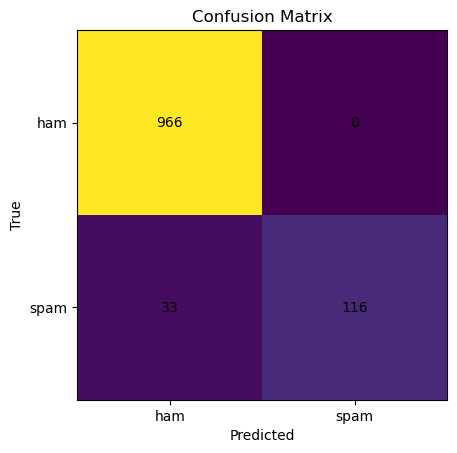

In [5]:
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, preds, labels=["ham", "spam"])
fig = plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.xticks([0,1], ["ham","spam"])
plt.yticks([0,1], ["ham","spam"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


In [6]:
def predict_sms(messages):
    return list(zip(messages, pipe.predict(messages)))

samples = [
    "CONGRATS! You’ve won a free vacation. Call now to claim.",
    "Hey, are we still meeting at 5?",
    "URGENT! Your account will be closed unless you update your info."
]
predict_sms(samples)


[('CONGRATS! You’ve won a free vacation. Call now to claim.', 'spam'),
 ('Hey, are we still meeting at 5?', 'ham'),
 ('URGENT! Your account will be closed unless you update your info.', 'ham')]

In [7]:
import joblib
joblib.dump(pipe, "sms_spam_model.joblib")
"Saved to sms_spam_model.joblib"


'Saved to sms_spam_model.joblib'

In [8]:
loaded = joblib.load("sms_spam_model.joblib")
loaded.predict(["Win a brand new iPhone by clicking this link!"])


array(['ham'], dtype=object)